In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Using Pandas to pull data from excel files

file_path_hoosier_r25b = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/TTC_data_matplotlib.xlsx"
file_path_goodyear_d2704 = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965run42.xlsx"
file_path_hoosier_s_r25b = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965run6.xlsx"
file_path_Cooper = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 7/cornering/A1706run18.xlsx"

df_r25b = pd.read_excel(file_path_hoosier_r25b, sheet_name=['IA_4_50_lb_FZ','IA_4_100_lb_FZ','IA_4_150_lb_FZ',\
                                                            'IA_4_250_lb_FZ','IA_4_350_lb_FZ','50_lb_FZ',\
                                                            '100_lb_FZ','150_lb_FZ','250_lb_FZ','350_lb_FZ',\
                                                            'IA_1_50_lb_FZ','IA_1_100_lb_FZ','IA_1_150_lb_FZ',\
                                                            'IA_1_250_lb_FZ','IA_1_350_lb_FZ','IA_2_50_lb_FZ',\
                                                            'IA_2_100_lb_FZ','IA_2_150_lb_FZ','IA_2_250_lb_FZ',\
                                                            'IA_2_350_lb_FZ','IA_3_50_lb_FZ','IA_3_100_lb_FZ',\
                                                            'IA_3_150_lb_FZ','IA_3_250_lb_FZ','IA_3_350_lb_FZ'])
df_d2704 = pd.read_excel(file_path_goodyear_d2704, sheet_name=['IA_4_250_lb_FZ'])
df_s_r25b = pd.read_excel(file_path_hoosier_s_r25b, sheet_name=['IA_4_250_lb_FZ'])
df_c_avon = pd.read_excel(file_path_Cooper, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

# Hoosier 20.5x7.0-13 R25B

# IA of 0
df_h_350 = df_r25b['350_lb_FZ']
df_h_250 = df_r25b['250_lb_FZ']
df_h_150 = df_r25b['150_lb_FZ']
df_h_100 = df_r25b['100_lb_FZ']
df_h_50 = df_r25b['50_lb_FZ']
# IA of 1
df_h_ia1_350 = df_r25b['IA_1_350_lb_FZ']
df_h_ia1_250 = df_r25b['IA_1_250_lb_FZ']
df_h_ia1_150 = df_r25b['IA_1_150_lb_FZ']
df_h_ia1_100 = df_r25b['IA_1_100_lb_FZ']
df_h_ia1_50 = df_r25b['IA_1_50_lb_FZ']
# IA of 2
df_h_ia2_350 = df_r25b['IA_2_350_lb_FZ']
df_h_ia2_250 = df_r25b['IA_2_250_lb_FZ']
df_h_ia2_150 = df_r25b['IA_2_150_lb_FZ']
df_h_ia2_100 = df_r25b['IA_2_100_lb_FZ']
df_h_ia2_50 = df_r25b['IA_2_50_lb_FZ']
# IA of 3
df_h_ia3_350 = df_r25b['IA_3_350_lb_FZ']
df_h_ia3_250 = df_r25b['IA_3_250_lb_FZ']
df_h_ia3_150 = df_r25b['IA_3_150_lb_FZ']
df_h_ia3_100 = df_r25b['IA_3_100_lb_FZ']
df_h_ia3_50 = df_r25b['IA_3_50_lb_FZ']
# IA of 4
df_h_ia4_350 = df_r25b['IA_4_350_lb_FZ']
df_h_ia4_250 = df_r25b['IA_4_250_lb_FZ']
df_h_ia4_150 = df_r25b['IA_4_150_lb_FZ']
df_h_ia4_100 = df_r25b['IA_4_100_lb_FZ']
df_h_ia4_50 = df_r25b['IA_4_50_lb_FZ']

# Goodyear 20x7-13 D2704
df_g_250 = df_d2704['IA_4_250_lb_FZ']

# Hoosier 16x7.5-10 R25B
df_h_s_250 = df_s_r25b['IA_4_250_lb_FZ']

# Cooper 20/7.2-13 AVON
df_c_250 = df_c_avon['IA_4_250_lb_FZ']


# Sorting data by SA smallest to largest

    # Hoosier 20.5x7.0-13 R25B

        # IA of 0
df_h_350 = df_h_350.sort_values(by='SA')
df_h_250 = df_h_250.sort_values(by='SA')
df_h_150 = df_h_150.sort_values(by='SA')
df_h_100 = df_h_100.sort_values(by='SA')
df_h_50 = df_h_50.sort_values(by='SA')
        # IA of 1
df_h_ia1_350 = df_h_ia1_350.sort_values(by='SA')
df_h_ia1_250 = df_h_ia1_250.sort_values(by='SA')
df_h_ia1_150 = df_h_ia1_150.sort_values(by='SA')
df_h_ia1_100 = df_h_ia1_100.sort_values(by='SA')
df_h_ia1_50 = df_h_ia1_50.sort_values(by='SA')
        # IA of 2
df_h_ia2_350 = df_h_ia2_350.sort_values(by='SA')
df_h_ia2_250 = df_h_ia2_250.sort_values(by='SA')
df_h_ia2_150 = df_h_ia2_150.sort_values(by='SA')
df_h_ia2_100 = df_h_ia2_100.sort_values(by='SA')
df_h_ia2_50 = df_h_ia2_50.sort_values(by='SA')
        # IA of 3
df_h_ia3_350 = df_h_ia3_350.sort_values(by='SA')
df_h_ia3_250 = df_h_ia3_250.sort_values(by='SA')
df_h_ia3_150 = df_h_ia3_150.sort_values(by='SA')
df_h_ia3_100 = df_h_ia3_100.sort_values(by='SA')
df_h_ia3_50 = df_h_ia3_50.sort_values(by='SA')
        # IA of 4
df_h_ia4_350 = df_h_ia4_350.sort_values(by='SA')
df_h_ia4_250 = df_h_ia4_250.sort_values(by='SA')
df_h_ia4_150 = df_h_ia4_150.sort_values(by='SA')
df_h_ia4_100 = df_h_ia4_100.sort_values(by='SA')
df_h_ia4_50 = df_h_ia4_50.sort_values(by='SA')

# Goodyear 20x7-13 D2704
df_g_250 = df_g_250.sort_values(by='SA')

# Hoosier 16x7.5-10 R25B
df_h_s_250 = df_h_s_250.sort_values(by='SA')

# Cooper 20/7.2-13 AVON
df_c_250 = df_c_250.sort_values(by='SA')

Tire Stiffness vs. Slip Angle (My Averaging Method)

In [3]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['350_lb_FZ']

# Sorting Data into lstles and Trimming (Hoosier R25B)

h_50_sa_H = Adata_H['SA']
h_50_sa_H = h_50_sa_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into lists (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in range(len(A_SA_H_tup)-40):
    a_avg = A_SA_H_tup[i:i+40]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(len(A_FY_H_tup)-40):
    a_avg = A_FY_H_tup[i:i+40]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_avg.append(a_avg)

# Finding Derivative

C_avg = []

for i in range(len(A_FY_H_avg)-1):

    if (A_SA_H_avg[i+1]-A_SA_H_avg[i]) != 0:
        dFYdSA = (A_FY_H_avg[i+1]-A_FY_H_avg[i])/(A_SA_H_avg[i+1]-A_SA_H_avg[i])
        C_avg.append(dFYdSA)

# converting data back into dataframe 

data_H = {'SA':A_SA_H_avg[:-1], 'FY':A_FY_H_avg[:-1], 'C':C_avg}

data_H = pd.DataFrame(data_H)

# Removing outliers

C = data_H['C']

for i in data_H.index:
    if (C[i] > 200) or (C[i]< -500):
        data_H = data_H.drop([i])

# converting dataframe back into lists

SA_lst = []

for i in data_H['SA']:
    SA_lst.append(i)

C_lst = []

for i in data_H['C']:
    C_lst.append(i)

# Averaging C data
    
C_avg = []

for i in range(len(C_lst)-20):
    a_avg = C_lst[i:i+20]
    a_avg = sum(a_avg)/(len(a_avg))
    C_avg.append(a_avg)

# Plotting

plt.plot(SA_lst[:-20], C_avg, label='13" Hoosier R25B')
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 and 16x7.5-10 R25B, Goodyear 20x7-13 D2704, \n4 deg IA, 25 mph, 12psi, 350lb FZ')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx'

Tire Stiffness vs. Slip Angle 
- Find SA vs. FY using non-dataframe method, i+20 method
- Find SA vs. C using dataframe, range(-13, 13, 0.1) method

          SA        FY
770  8.67105 -626.0445
           SA        FY
1214  11.7463 -634.2355
           SA        FY
1244  12.5551 -503.6335


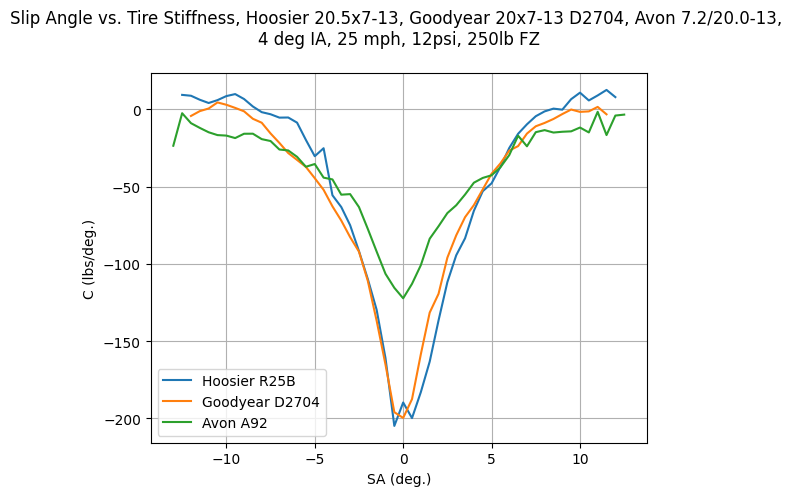

In [4]:
# Sorting Data into Tuples and Trimming (Hoosier R25B)

h_350_sa = df_h_ia4_250['SA']
h_350_sa = h_350_sa[1:]

h_350_fy = df_h_ia4_250['FY']
h_350_fy = h_350_fy[1:]

# Turning Pandas data into lists (Hoosier R25B)

h_350_sa_lst = []

for i in h_350_sa:
    h_350_sa_lst.append(i)

h_350_fy_lst = []

for i in h_350_fy:
    h_350_fy_lst.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
h_350_sa_avg = []
h_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(h_350_sa_lst)-int(avg/2)):
    a_avg = h_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(h_350_fy_lst)-int(avg/2)):
    a_avg = h_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_350_fy_avg.append(a_avg)

# Converting Data into Dataframe (Hoosier R25B)
    
data = {'SA':h_350_sa_avg[:-1], 'FY':h_350_fy_avg[:-1]}

df_h = pd.DataFrame(data)

print(df_h.loc[df_h['FY'] == df_h.min()['FY']])

# Finding C using Aidan's Dataframe method (Hoosier R25B)

for i in [x/10 for x in range(-135, 135, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = df_h.loc[((df_h['SA']) > i-0.25) & ((df_h['SA']) < i + 0.25)]
    # get average values for each interval
    df_h.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Hoosier R25B)

sa = df_h['SA']

for i in df_h.index:   
    if i != sa[i]:
        df_h = df_h.drop([i])

df_h = df_h.sort_values(by='SA')

# Finding Derivatives (Hoosier R25B)

sa_lst = []
for i in df_h['SA']:
    sa_lst.append(i)

fy_lst = []
for i in df_h['FY']:
    fy_lst.append(i)

c_avg = []

for i in range(len(df_h['SA'])-1):
    if (sa_lst[i+1]-sa_lst[i]) != 0:
        dFYdSA = (fy_lst[i+1]-fy_lst[i])/(sa_lst[i+1]-sa_lst[i])
        c_avg.append(dFYdSA)

# Sorting Data into Tuples and Trimming (Goodyear D2704)

g_250_sa = df_g_250['SA']
g_250_sa = g_250_sa[1:]

g_250_fy = df_g_250['FY']
g_250_fy = g_250_fy[1:]

# Turning Pandas data into lists (Goodyear D2704)

g_250_sa_lst = []

for i in g_250_sa:
    g_250_sa_lst.append(i)

g_250_fy_lst = []

for i in g_250_fy:
    g_250_fy_lst.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
g_250_sa_avg = []
g_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (Goodyear D2704)

avg = 20

for i in range(int(avg/2), len(g_250_sa_lst)-int(avg/2)):
    a_avg = g_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    g_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Goodyear D2704)
        
for i in range(int(avg/2), len(g_250_fy_lst)-int(avg/2)):
    a_avg = g_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    g_250_fy_avg.append(a_avg)

# Converting Data into Dataframe (Goodyear D2704)
    
data = {'SA':g_250_sa_avg[:-1], 'FY':g_250_fy_avg[:-1]}

df_g = pd.DataFrame(data)

print(df_g.loc[df_g['FY'] == df_g.min()['FY']])

# Finding C using Aidan's Dataframe method (Goodyear D2704)

for i in [x/10 for x in range(-135, 135, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = df_g.loc[((df_g['SA']) > i-0.25) & ((df_g['SA']) < i + 0.25)]
    # get average values for each interval
    df_g.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Goodyear D2704)

g_250_sa = df_g['SA']

for i in df_g.index:   
    if i != g_250_sa[i]:
        df_g = df_g.drop([i])

df_g = df_g.sort_values(by='SA')

# Finding Derivatives (Goodyear D2704)

g_250_sa_lst = []
for i in df_g['SA']:
    g_250_sa_lst.append(i)

g_250_fy_lst = []
for i in df_g['FY']:
    g_250_fy_lst.append(i)

g_250_c_avg = []

for i in range(len(df_g['SA'])-1):
    if (g_250_sa_lst[i+1]-g_250_sa_lst[i]) != 0:
        dFYdSA = (g_250_fy_lst[i+1]-g_250_fy_lst[i])/(g_250_sa_lst[i+1]-g_250_sa_lst[i])
        g_250_c_avg.append(dFYdSA)

# Sorting Data into Tuples and Trimming (Avon A92)

c_250_sa = df_c_250['SA']
c_250_sa = c_250_sa[1:]

c_250_fy = df_c_250['FY']
c_250_fy = c_250_fy[1:]

# Turning Pandas data into lists (Avon A92)

c_250_sa_lst = []

for i in c_250_sa:
    c_250_sa_lst.append(i)

c_250_fy_lst = []

for i in c_250_fy:
    c_250_fy_lst.append(i)

# Variables for below averaging functions (Avon A92)
    
c_250_sa_avg = []
c_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (Avon A92)

avg = 20

for i in range(int(avg/2), len(c_250_sa_lst)-int(avg/2)):
    a_avg = c_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Avon A92)
        
for i in range(int(avg/2), len(c_250_fy_lst)-int(avg/2)):
    a_avg = c_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_250_fy_avg.append(a_avg)

# Converting Data into Dataframe (Avon A92)
    
data = {'SA':c_250_sa_avg[:-1], 'FY':c_250_fy_avg[:-1]}

df_c = pd.DataFrame(data)

print(df_c.loc[df_c['FY'] == df_c.min()['FY']])

# Finding C using Aidan's Dataframe method (Avon A92)

for i in [x/10 for x in range(-135, 135, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = df_c.loc[((df_c['SA']) > i-0.25) & ((df_c['SA']) < i + 0.25)]
    # get average values for each interval
    df_c.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Avon A92)

c_250_sa = df_c['SA']

for i in df_c.index:   
    if i != c_250_sa[i]:
        df_c = df_c.drop([i])

df_c = df_c.sort_values(by='SA')

# Finding Derivatives (Avon A92)

c_250_sa_lst = []
for i in df_c['SA']:
    c_250_sa_lst.append(i)

c_250_fy_lst = []
for i in df_c['FY']:
    c_250_fy_lst.append(i)

c_250_c_avg = []

for i in range(len(df_c['SA'])-1):
    if (c_250_sa_lst[i+1]-c_250_sa_lst[i]) != 0:
        dFYdSA = (c_250_fy_lst[i+1]-c_250_fy_lst[i])/(c_250_sa_lst[i+1]-c_250_sa_lst[i])
        c_250_c_avg.append(dFYdSA)

# Plotting

plt.plot(sa_lst[:-1], c_avg, label='Hoosier R25B')
plt.plot(g_250_sa_lst[:-1], g_250_c_avg, label='Goodyear D2704')
plt.plot(c_250_sa_lst[:-1], c_250_c_avg, label='Avon A92')
plt.title('Slip Angle vs. Tire Stiffness, Hoosier 20.5x7-13, Goodyear 20x7-13 D2704, Avon 7.2/20.0-13, \n4 deg IA, 25 mph, 12psi, 250lb FZ\n')
plt.xlabel('SA (deg.)')
plt.ylabel('C (lbs/deg.)')
plt.grid(True)
plt.legend()
plt.show()

Slip Angle vs. Lateral Force Hoosier 20.5x7.0-13 R25B IA 0

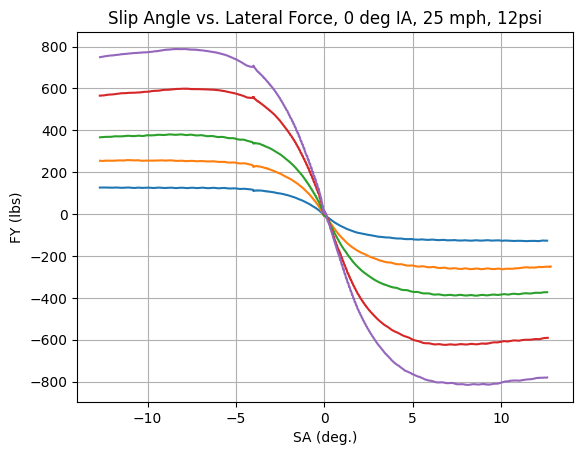

In [6]:
# Sorting Data into Tuples and Trimming (50 lb)

h_50_sa = df_h_50['SA']
h_50_sa = h_50_sa[1:]

h_50_fy = df_h_50['FY']
h_50_fy = h_50_fy[1:]

# Turning Pandas data into tuples (50lb)

h_50_sa_lst = []

for i in h_50_sa:
    h_50_sa_lst.append(i)

h_50_fy_lst = []

for i in h_50_fy:
    h_50_fy_lst.append(i)

# Variables for below averaging functions (50lb)
    
h_50_sa_avg = []
h_50_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 20

for i in range(int(avg/2), len(h_50_sa_lst)-int(avg/2)):
    a_avg = h_50_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_50_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in range(int(avg/2), len(h_50_fy_lst)-int(avg/2)):
    a_avg = h_50_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_50_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (100 lb)

h_100_sa = df_h_100['SA']
h_100_sa = h_100_sa[1:]

h_100_fy = df_h_100['FY']
h_100_fy = h_100_fy[1:]

# Turning Pandas data into tuples (100lb)

h_100_sa_lst = []

for i in h_100_sa:
    h_100_sa_lst.append(i)

h_100_fy_lst = []

for i in h_100_fy:
    h_100_fy_lst.append(i)

# Variables for below averaging functions (100lb)
    
h_100_sa_avg = []
h_100_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (100lb)

avg = 20

for i in range(int(avg/2), len(h_100_sa_lst)-int(avg/2)):
    a_avg = h_100_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_100_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (100lb)
        
for i in range(int(avg/2), len(h_100_fy_lst)-int(avg/2)):
    a_avg = h_100_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_100_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (150 lb)

h_150_sa = df_h_150['SA']
h_150_sa = h_150_sa[1:]

h_150_fy = df_h_150['FY']
h_150_fy = h_150_fy[1:]

# Turning Pandas data into tuples (150lb)

h_150_sa_lst = []

for i in h_150_sa:
    h_150_sa_lst.append(i)

h_150_fy_lst = []

for i in h_150_fy:
    h_150_fy_lst.append(i)

# Variables for below averaging functions (150lb)
    
h_150_sa_avg = []
h_150_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 20

for i in range(int(avg/2), len(h_150_sa_lst)-int(avg/2)):
    a_avg = h_150_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_150_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (150lb)
        
for i in range(int(avg/2), len(h_150_fy_lst)-int(avg/2)):
    a_avg = h_150_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_150_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (250 lb)

h_250_sa = df_h_250['SA']
h_250_sa = h_250_sa[1:]

h_250_fy = df_h_250['FY']
h_250_fy = h_250_fy[1:]

# Turning Pandas data into tuples (250lb)

h_250_sa_lst = []

for i in h_250_sa:
    h_250_sa_lst.append(i)

h_250_fy_lst = []

for i in h_250_fy:
    h_250_fy_lst.append(i)

# Variables for below averaging functions (250lb)
    
h_250_sa_avg = []
h_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in range(int(avg/2), len(h_250_sa_lst)-int(avg/2)):
    a_avg = h_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (250lb)
        
for i in range(int(avg/2), len(h_250_fy_lst)-int(avg/2)):
    a_avg = h_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_250_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (350 lb)

h_350_sa = df_h_350['SA']
h_350_sa = h_350_sa[1:]

h_350_fy = df_h_350['FY']
h_350_fy = h_350_fy[1:]

# Turning Pandas data into tuples (350lb)

h_350_sa_lst = []

for i in h_350_sa:
    h_350_sa_lst.append(i)

h_350_fy_lst = []

for i in h_350_fy:
    h_350_fy_lst.append(i)

# Variables for below averaging functions (350lb)
    
h_350_sa_avg = []
h_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 20

for i in range(int(avg/2), len(h_350_sa_lst)-int(avg/2)):
    a_avg = h_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (350lb)
        
for i in range(int(avg/2), len(h_350_fy_lst)-int(avg/2)):
    a_avg = h_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_350_fy_avg.append(a_avg)

# Plotting using Seaborn
        
# Plotting using MatPlotLib
plt.plot(h_50_sa_avg, h_50_fy_avg)
plt.plot(h_100_sa_avg, h_100_fy_avg)
plt.plot(h_150_sa_avg, h_150_fy_avg)
plt.plot(h_250_sa_avg, h_250_fy_avg)
plt.plot(h_350_sa_avg, h_350_fy_avg)
plt.title('Slip Angle vs. Lateral Force, 0 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Lateral Force Hoosier 20.5x7.0-13 R25B IA 1

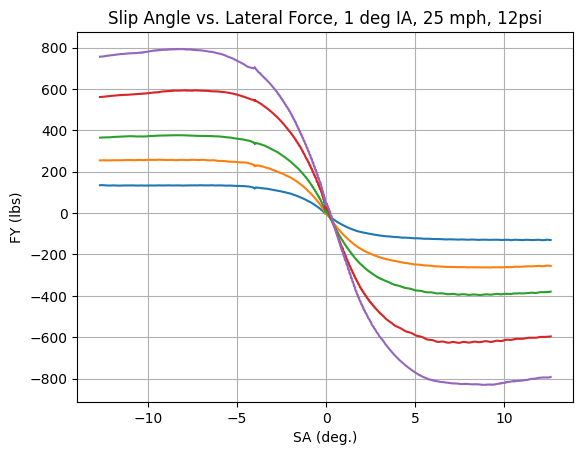

In [7]:
# Sorting Data into Tuples and Trimming (50 lb)

h_ia1_50_sa = df_h_ia1_50['SA']
h_ia1_50_sa = h_ia1_50_sa[1:]

h_ia1_50_fy = df_h_ia1_50['FY']
h_ia1_50_fy = h_ia1_50_fy[1:]

# Turning Pandas data into tuples (50lb)

h_ia1_50_sa_lst = []

for i in h_ia1_50_sa:
    h_ia1_50_sa_lst.append(i)

h_ia1_50_fy_lst = []

for i in h_ia1_50_fy:
    h_ia1_50_fy_lst.append(i)

# Variables for below averaging functions (50lb)
    
h_ia1_50_sa_avg = []
h_ia1_50_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 20

for i in range(int(avg/2), len(h_ia1_50_sa_lst)-int(avg/2)):
    a_avg = h_ia1_50_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_50_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in range(int(avg/2), len(h_ia1_50_fy_lst)-int(avg/2)):
    a_avg = h_ia1_50_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_50_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (100 lb)

h_ia1_100_sa = df_h_ia1_100['SA']
h_ia1_100_sa = h_ia1_100_sa[1:]

h_ia1_100_fy = df_h_ia1_100['FY']
h_ia1_100_fy = h_ia1_100_fy[1:]

# Turning Pandas data into tuples (100lb)

h_ia1_100_sa_lst = []

for i in h_ia1_100_sa:
    h_ia1_100_sa_lst.append(i)

h_ia1_100_fy_lst = []

for i in h_ia1_100_fy:
    h_ia1_100_fy_lst.append(i)

# Variables for below averaging functions (100lb)
    
h_ia1_100_sa_avg = []
h_ia1_100_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (100lb)

avg = 20

for i in range(int(avg/2), len(h_ia1_100_sa_lst)-int(avg/2)):
    a_avg = h_ia1_100_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_100_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (100lb)
        
for i in range(int(avg/2), len(h_ia1_100_fy_lst)-int(avg/2)):
    a_avg = h_ia1_100_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_100_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (150 lb)

h_ia1_150_sa = df_h_ia1_150['SA']
h_ia1_150_sa = h_ia1_150_sa[1:]

h_ia1_150_fy = df_h_ia1_150['FY']
h_ia1_150_fy = h_ia1_150_fy[1:]

# Turning Pandas data into tuples (150lb)

h_ia1_150_sa_lst = []

for i in h_ia1_150_sa:
    h_ia1_150_sa_lst.append(i)

h_ia1_150_fy_lst = []

for i in h_ia1_150_fy:
    h_ia1_150_fy_lst.append(i)

# Variables for below averaging functions (150lb)
    
h_ia1_150_sa_avg = []
h_ia1_150_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 20

for i in range(int(avg/2), len(h_ia1_150_sa_lst)-int(avg/2)):
    a_avg = h_ia1_150_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_150_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (150lb)
        
for i in range(int(avg/2), len(h_ia1_150_fy_lst)-int(avg/2)):
    a_avg = h_ia1_150_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_150_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (250 lb)

h_ia1_250_sa = df_h_ia1_250['SA']
h_ia1_250_sa = h_ia1_250_sa[1:]

h_ia1_250_fy = df_h_ia1_250['FY']
h_ia1_250_fy = h_ia1_250_fy[1:]

# Turning Pandas data into tuples (250lb)

h_ia1_250_sa_lst = []

for i in h_ia1_250_sa:
    h_ia1_250_sa_lst.append(i)

h_ia1_250_fy_lst = []

for i in h_ia1_250_fy:
    h_ia1_250_fy_lst.append(i)

# Variables for below averaging functions (250lb)
    
h_ia1_250_sa_avg = []
h_ia1_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in range(int(avg/2), len(h_ia1_250_sa_lst)-int(avg/2)):
    a_avg = h_ia1_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (250lb)
        
for i in range(int(avg/2), len(h_ia1_250_fy_lst)-int(avg/2)):
    a_avg = h_ia1_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_250_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (350 lb)

h_ia1_350_sa = df_h_ia1_350['SA']
h_ia1_350_sa = h_ia1_350_sa[1:]

h_ia1_350_fy = df_h_ia1_350['FY']
h_ia1_350_fy = h_ia1_350_fy[1:]

# Turning Pandas data into tuples (350lb)

h_ia1_350_sa_lst = []

for i in h_ia1_350_sa:
    h_ia1_350_sa_lst.append(i)

h_ia1_350_fy_lst = []

for i in h_ia1_350_fy:
    h_ia1_350_fy_lst.append(i)

# Variables for below averaging functions (350lb)
    
h_ia1_350_sa_avg = []
h_ia1_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 20

for i in range(int(avg/2), len(h_ia1_350_sa_lst)-int(avg/2)):
    a_avg = h_ia1_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (350lb)
        
for i in range(int(avg/2), len(h_ia1_350_fy_lst)-int(avg/2)):
    a_avg = h_ia1_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia1_350_fy_avg.append(a_avg)

# Plotting using Seaborn
        
# Plotting using MatPlotLib
plt.plot(h_ia1_50_sa_avg, h_ia1_50_fy_avg)
plt.plot(h_ia1_100_sa_avg, h_ia1_100_fy_avg)
plt.plot(h_ia1_150_sa_avg, h_ia1_150_fy_avg)
plt.plot(h_ia1_250_sa_avg, h_ia1_250_fy_avg)
plt.plot(h_ia1_350_sa_avg, h_ia1_350_fy_avg)
plt.title('Slip Angle vs. Lateral Force, 1 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Lateral Force Hoosier 20.5x7.0-13 R25B IA 2

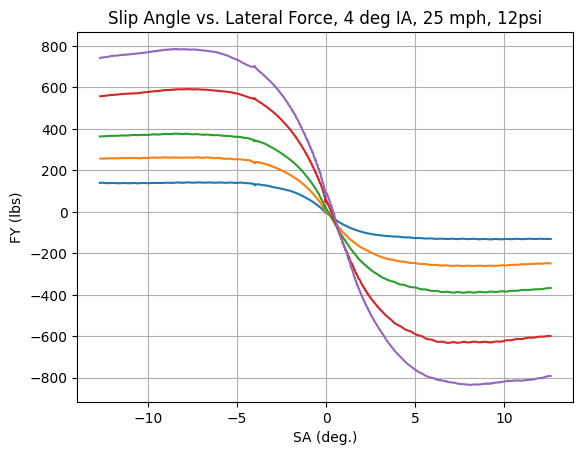

In [8]:
# Sorting Data into Tuples and Trimming (50 lb)

h_ia2_50_sa = df_h_ia2_50['SA']
h_ia2_50_sa = h_ia2_50_sa[1:]

h_ia2_50_fy = df_h_ia2_50['FY']
h_ia2_50_fy = h_ia2_50_fy[1:]

# Turning Pandas data into tuples (50lb)

h_ia2_50_sa_lst = []

for i in h_ia2_50_sa:
    h_ia2_50_sa_lst.append(i)

h_ia2_50_fy_lst = []

for i in h_ia2_50_fy:
    h_ia2_50_fy_lst.append(i)

# Variables for below averaging functions (50lb)
    
h_ia2_50_sa_avg = []
h_ia2_50_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 20

for i in range(int(avg/2), len(h_ia2_50_sa_lst)-int(avg/2)):
    a_avg = h_ia2_50_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_50_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in range(int(avg/2), len(h_ia2_50_fy_lst)-int(avg/2)):
    a_avg = h_ia2_50_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_50_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (100 lb)

h_ia2_100_sa = df_h_ia2_100['SA']
h_ia2_100_sa = h_ia2_100_sa[1:]

h_ia2_100_fy = df_h_ia2_100['FY']
h_ia2_100_fy = h_ia2_100_fy[1:]

# Turning Pandas data into tuples (100lb)

h_ia2_100_sa_lst = []

for i in h_ia2_100_sa:
    h_ia2_100_sa_lst.append(i)

h_ia2_100_fy_lst = []

for i in h_ia2_100_fy:
    h_ia2_100_fy_lst.append(i)

# Variables for below averaging functions (100lb)
    
h_ia2_100_sa_avg = []
h_ia2_100_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (100lb)

avg = 20

for i in range(int(avg/2), len(h_ia2_100_sa_lst)-int(avg/2)):
    a_avg = h_ia2_100_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_100_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (100lb)
        
for i in range(int(avg/2), len(h_ia2_100_fy_lst)-int(avg/2)):
    a_avg = h_ia2_100_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_100_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (150 lb)

h_ia2_150_sa = df_h_ia2_150['SA']
h_ia2_150_sa = h_ia2_150_sa[1:]

h_ia2_150_fy = df_h_ia2_150['FY']
h_ia2_150_fy = h_ia2_150_fy[1:]

# Turning Pandas data into tuples (150lb)

h_ia2_150_sa_lst = []

for i in h_ia2_150_sa:
    h_ia2_150_sa_lst.append(i)

h_ia2_150_fy_lst = []

for i in h_ia2_150_fy:
    h_ia2_150_fy_lst.append(i)

# Variables for below averaging functions (150lb)
    
h_ia2_150_sa_avg = []
h_ia2_150_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 20

for i in range(int(avg/2), len(h_ia2_150_sa_lst)-int(avg/2)):
    a_avg = h_ia2_150_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_150_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (150lb)
        
for i in range(int(avg/2), len(h_ia2_150_fy_lst)-int(avg/2)):
    a_avg = h_ia2_150_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_150_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (250 lb)

h_ia2_250_sa = df_h_ia2_250['SA']
h_ia2_250_sa = h_ia2_250_sa[1:]

h_ia2_250_fy = df_h_ia2_250['FY']
h_ia2_250_fy = h_ia2_250_fy[1:]

# Turning Pandas data into tuples (250lb)

h_ia2_250_sa_lst = []

for i in h_ia2_250_sa:
    h_ia2_250_sa_lst.append(i)

h_ia2_250_fy_lst = []

for i in h_ia2_250_fy:
    h_ia2_250_fy_lst.append(i)

# Variables for below averaging functions (250lb)
    
h_ia2_250_sa_avg = []
h_ia2_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in range(int(avg/2), len(h_ia2_250_sa_lst)-int(avg/2)):
    a_avg = h_ia2_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (250lb)
        
for i in range(int(avg/2), len(h_ia2_250_fy_lst)-int(avg/2)):
    a_avg = h_ia2_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_250_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (350 lb)

h_ia2_350_sa = df_h_ia2_350['SA']
h_ia2_350_sa = h_ia2_350_sa[1:]

h_ia2_350_fy = df_h_ia2_350['FY']
h_ia2_350_fy = h_ia2_350_fy[1:]

# Turning Pandas data into tuples (350lb)

h_ia2_350_sa_lst = []

for i in h_ia2_350_sa:
    h_ia2_350_sa_lst.append(i)

h_ia2_350_fy_lst = []

for i in h_ia2_350_fy:
    h_ia2_350_fy_lst.append(i)

# Variables for below averaging functions (350lb)
    
h_ia2_350_sa_avg = []
h_ia2_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 20

for i in range(int(avg/2), len(h_ia2_350_sa_lst)-int(avg/2)):
    a_avg = h_ia2_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (350lb)
        
for i in range(int(avg/2), len(h_ia2_350_fy_lst)-int(avg/2)):
    a_avg = h_ia2_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia2_350_fy_avg.append(a_avg)

# Plotting using Seaborn
        
# Plotting using MatPlotLib
plt.plot(h_ia2_50_sa_avg, h_ia2_50_fy_avg)
plt.plot(h_ia2_100_sa_avg, h_ia2_100_fy_avg)
plt.plot(h_ia2_150_sa_avg, h_ia2_150_fy_avg)
plt.plot(h_ia2_250_sa_avg, h_ia2_250_fy_avg)
plt.plot(h_ia2_350_sa_avg, h_ia2_350_fy_avg)
plt.title('Slip Angle vs. Lateral Force, 4 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Lateral Force Hoosier 20.5x7.0-13 R25B IA 3

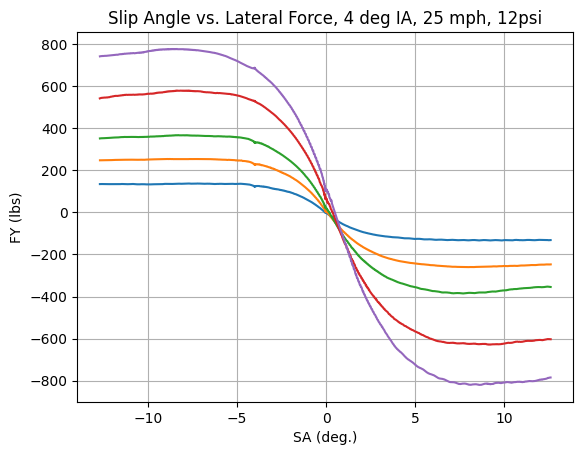

In [10]:
# Sorting Data into Tuples and Trimming (50 lb)

h_ia3_50_sa = df_h_ia3_50['SA']
h_ia3_50_sa = h_ia3_50_sa[1:]

h_ia3_50_fy = df_h_ia3_50['FY']
h_ia3_50_fy = h_ia3_50_fy[1:]

# Turning Pandas data into tuples (50lb)

h_ia3_50_sa_lst = []

for i in h_ia3_50_sa:
    h_ia3_50_sa_lst.append(i)

h_ia3_50_fy_lst = []

for i in h_ia3_50_fy:
    h_ia3_50_fy_lst.append(i)

# Variables for below averaging functions (50lb)
    
h_ia3_50_sa_avg = []
h_ia3_50_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 20

for i in range(int(avg/2), len(h_ia3_50_sa_lst)-int(avg/2)):
    a_avg = h_ia3_50_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_50_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in range(int(avg/2), len(h_ia3_50_fy_lst)-int(avg/2)):
    a_avg = h_ia3_50_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_50_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (100 lb)

h_ia3_100_sa = df_h_ia3_100['SA']
h_ia3_100_sa = h_ia3_100_sa[1:]

h_ia3_100_fy = df_h_ia3_100['FY']
h_ia3_100_fy = h_ia3_100_fy[1:]

# Turning Pandas data into tuples (100lb)

h_ia3_100_sa_lst = []

for i in h_ia3_100_sa:
    h_ia3_100_sa_lst.append(i)

h_ia3_100_fy_lst = []

for i in h_ia3_100_fy:
    h_ia3_100_fy_lst.append(i)

# Variables for below averaging functions (100lb)
    
h_ia3_100_sa_avg = []
h_ia3_100_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (100lb)

avg = 20

for i in range(int(avg/2), len(h_ia3_100_sa_lst)-int(avg/2)):
    a_avg = h_ia3_100_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_100_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (100lb)
        
for i in range(int(avg/2), len(h_ia3_100_fy_lst)-int(avg/2)):
    a_avg = h_ia3_100_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_100_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (150 lb)

h_ia3_150_sa = df_h_ia3_150['SA']
h_ia3_150_sa = h_ia3_150_sa[1:]

h_ia3_150_fy = df_h_ia3_150['FY']
h_ia3_150_fy = h_ia3_150_fy[1:]

# Turning Pandas data into tuples (150lb)

h_ia3_150_sa_lst = []

for i in h_ia3_150_sa:
    h_ia3_150_sa_lst.append(i)

h_ia3_150_fy_lst = []

for i in h_ia3_150_fy:
    h_ia3_150_fy_lst.append(i)

# Variables for below averaging functions (150lb)
    
h_ia3_150_sa_avg = []
h_ia3_150_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 20

for i in range(int(avg/2), len(h_ia3_150_sa_lst)-int(avg/2)):
    a_avg = h_ia3_150_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_150_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (150lb)
        
for i in range(int(avg/2), len(h_ia3_150_fy_lst)-int(avg/2)):
    a_avg = h_ia3_150_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_150_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (250 lb)

h_ia3_250_sa = df_h_ia3_250['SA']
h_ia3_250_sa = h_ia3_250_sa[1:]

h_ia3_250_fy = df_h_ia3_250['FY']
h_ia3_250_fy = h_ia3_250_fy[1:]

# Turning Pandas data into tuples (250lb)

h_ia3_250_sa_lst = []

for i in h_ia3_250_sa:
    h_ia3_250_sa_lst.append(i)

h_ia3_250_fy_lst = []

for i in h_ia3_250_fy:
    h_ia3_250_fy_lst.append(i)

# Variables for below averaging functions (250lb)
    
h_ia3_250_sa_avg = []
h_ia3_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in range(int(avg/2), len(h_ia3_250_sa_lst)-int(avg/2)):
    a_avg = h_ia3_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (250lb)
        
for i in range(int(avg/2), len(h_ia3_250_fy_lst)-int(avg/2)):
    a_avg = h_ia3_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_250_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (350 lb)

h_ia3_350_sa = df_h_ia3_350['SA']
h_ia3_350_sa = h_ia3_350_sa[1:]

h_ia3_350_fy = df_h_ia3_350['FY']
h_ia3_350_fy = h_ia3_350_fy[1:]

# Turning Pandas data into tuples (350lb)

h_ia3_350_sa_lst = []

for i in h_ia3_350_sa:
    h_ia3_350_sa_lst.append(i)

h_ia3_350_fy_lst = []

for i in h_ia3_350_fy:
    h_ia3_350_fy_lst.append(i)

# Variables for below averaging functions (350lb)
    
h_ia3_350_sa_avg = []
h_ia3_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 20

for i in range(int(avg/2), len(h_ia3_350_sa_lst)-int(avg/2)):
    a_avg = h_ia3_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (350lb)
        
for i in range(int(avg/2), len(h_ia3_350_fy_lst)-int(avg/2)):
    a_avg = h_ia3_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia3_350_fy_avg.append(a_avg)

# Plotting using Seaborn
        
# Plotting using MatPlotLib
plt.plot(h_ia3_50_sa_avg, h_ia3_50_fy_avg)
plt.plot(h_ia3_100_sa_avg, h_ia3_100_fy_avg)
plt.plot(h_ia3_150_sa_avg, h_ia3_150_fy_avg)
plt.plot(h_ia3_250_sa_avg, h_ia3_250_fy_avg)
plt.plot(h_ia3_350_sa_avg, h_ia3_350_fy_avg)
plt.title('Slip Angle vs. Lateral Force, 4 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Lateral Force Hoosier 20.5x7.0-13 R25B IA 4

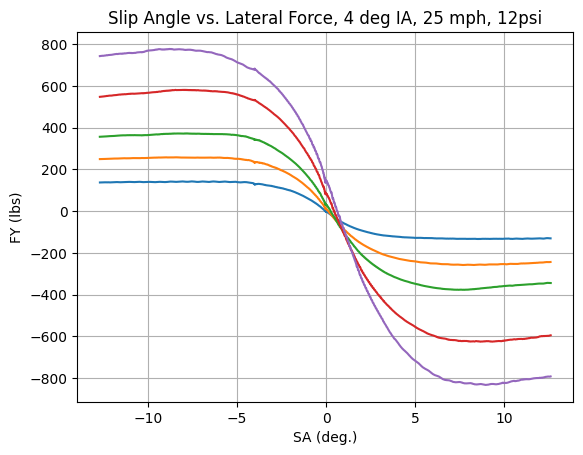

In [5]:
# Sorting Data into Tuples and Trimming (50 lb)

h_ia4_50_sa = df_h_ia4_50['SA']
h_ia4_50_sa = h_ia4_50_sa[1:]

h_ia4_50_fy = df_h_ia4_50['FY']
h_ia4_50_fy = h_ia4_50_fy[1:]

# Turning Pandas data into tuples (50lb)

h_ia4_50_sa_lst = []

for i in h_ia4_50_sa:
    h_ia4_50_sa_lst.append(i)

h_ia4_50_fy_lst = []

for i in h_ia4_50_fy:
    h_ia4_50_fy_lst.append(i)

# Variables for below averaging functions (50lb)
    
h_ia4_50_sa_avg = []
h_ia4_50_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 20

for i in range(int(avg/2), len(h_ia4_50_sa_lst)-int(avg/2)):
    a_avg = h_ia4_50_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_50_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in range(int(avg/2), len(h_ia4_50_fy_lst)-int(avg/2)):
    a_avg = h_ia4_50_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_50_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (100 lb)

h_ia4_100_sa = df_h_ia4_100['SA']
h_ia4_100_sa = h_ia4_100_sa[1:]

h_ia4_100_fy = df_h_ia4_100['FY']
h_ia4_100_fy = h_ia4_100_fy[1:]

# Turning Pandas data into tuples (100lb)

h_ia4_100_sa_lst = []

for i in h_ia4_100_sa:
    h_ia4_100_sa_lst.append(i)

h_ia4_100_fy_lst = []

for i in h_ia4_100_fy:
    h_ia4_100_fy_lst.append(i)

# Variables for below averaging functions (100lb)
    
h_ia4_100_sa_avg = []
h_ia4_100_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (100lb)

avg = 20

for i in range(int(avg/2), len(h_ia4_100_sa_lst)-int(avg/2)):
    a_avg = h_ia4_100_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_100_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (100lb)
        
for i in range(int(avg/2), len(h_ia4_100_fy_lst)-int(avg/2)):
    a_avg = h_ia4_100_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_100_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (150 lb)

h_ia4_150_sa = df_h_ia4_150['SA']
h_ia4_150_sa = h_ia4_150_sa[1:]

h_ia4_150_fy = df_h_ia4_150['FY']
h_ia4_150_fy = h_ia4_150_fy[1:]

# Turning Pandas data into tuples (150lb)

h_ia4_150_sa_lst = []

for i in h_ia4_150_sa:
    h_ia4_150_sa_lst.append(i)

h_ia4_150_fy_lst = []

for i in h_ia4_150_fy:
    h_ia4_150_fy_lst.append(i)

# Variables for below averaging functions (150lb)
    
h_ia4_150_sa_avg = []
h_ia4_150_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 20

for i in range(int(avg/2), len(h_ia4_150_sa_lst)-int(avg/2)):
    a_avg = h_ia4_150_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_150_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (150lb)
        
for i in range(int(avg/2), len(h_ia4_150_fy_lst)-int(avg/2)):
    a_avg = h_ia4_150_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_150_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (250 lb)

h_ia4_250_sa = df_h_ia4_250['SA']
h_ia4_250_sa = h_ia4_250_sa[1:]

h_ia4_250_fy = df_h_ia4_250['FY']
h_ia4_250_fy = h_ia4_250_fy[1:]

# Turning Pandas data into tuples (250lb)

h_ia4_250_sa_lst = []

for i in h_ia4_250_sa:
    h_ia4_250_sa_lst.append(i)

h_ia4_250_fy_lst = []

for i in h_ia4_250_fy:
    h_ia4_250_fy_lst.append(i)

# Variables for below averaging functions (250lb)
    
h_ia4_250_sa_avg = []
h_ia4_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in range(int(avg/2), len(h_ia4_250_sa_lst)-int(avg/2)):
    a_avg = h_ia4_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (250lb)
        
for i in range(int(avg/2), len(h_ia4_250_fy_lst)-int(avg/2)):
    a_avg = h_ia4_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_250_fy_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (350 lb)

h_ia4_350_sa = df_h_ia4_350['SA']
h_ia4_350_sa = h_ia4_350_sa[1:]

h_ia4_350_fy = df_h_ia4_350['FY']
h_ia4_350_fy = h_ia4_350_fy[1:]

# Turning Pandas data into tuples (350lb)

h_ia4_350_sa_lst = []

for i in h_ia4_350_sa:
    h_ia4_350_sa_lst.append(i)

h_ia4_350_fy_lst = []

for i in h_ia4_350_fy:
    h_ia4_350_fy_lst.append(i)

# Variables for below averaging functions (350lb)
    
h_ia4_350_sa_avg = []
h_ia4_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 20

for i in range(int(avg/2), len(h_ia4_350_sa_lst)-int(avg/2)):
    a_avg = h_ia4_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (350lb)
        
for i in range(int(avg/2), len(h_ia4_350_fy_lst)-int(avg/2)):
    a_avg = h_ia4_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_ia4_350_fy_avg.append(a_avg)

# Plotting using Seaborn
        
# Plotting using MatPlotLib
plt.plot(h_ia4_50_sa_avg, h_ia4_50_fy_avg)
plt.plot(h_ia4_100_sa_avg, h_ia4_100_fy_avg)
plt.plot(h_ia4_150_sa_avg, h_ia4_150_fy_avg)
plt.plot(h_ia4_250_sa_avg, h_ia4_250_fy_avg)
plt.plot(h_ia4_350_sa_avg, h_ia4_350_fy_avg)
plt.title('Slip Angle vs. Lateral Force, 4 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Alignment Torque Hoosier 20.5x7.0-13 R25B

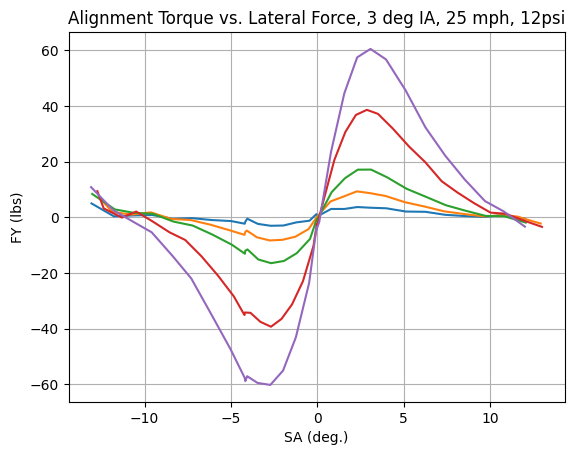

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Using Pandas to pull data from excel file

file_path = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/TTC_data_matplotlib.xlsx"
data = pd.read_excel(file_path, sheet_name=['50_lb_FZ','100_lb_FZ','150_lb_FZ','250_lb_FZ','350_lb_FZ'])

# Sorting Different Seats into Data

Adata = data['50_lb_FZ']
Bdata = data['100_lb_FZ']
Cdata = data['150_lb_FZ']
Ddata = data['250_lb_FZ']
Edata = data['350_lb_FZ']

# Sorting Data into Tuples and Trimming (50 lb)

A_SA = Adata['SA']
A_SA = A_SA[1:]

A_MZ = Adata['MZ']
A_MZ = A_MZ[1:]

# Turning Pandas data into tuples (50lb)

A_SA_tup = []

for i in A_SA:
    A_SA_tup.append(i)

A_MZ_tup = []

for i in A_MZ:
    A_MZ_tup.append(i)

# Variables for below averaging functions (50lb)
    
A_SA_avg = []
A_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 25

for i in A_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (50lb)
        
for i in A_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (100 lb)

B_SA = Bdata['SA']
B_SA = B_SA[1:]

B_MZ = Bdata['MZ']
B_MZ = B_MZ[1:]

# Turning Pandas data into tuples (100lb)

B_SA_tup = []

for i in B_SA:
    B_SA_tup.append(i)

B_MZ_tup = []

for i in B_MZ:
    B_MZ_tup.append(i)

# Variables for below averaging functions (50lb)
    
B_SA_avg = []
B_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 25

for i in B_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        B_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (50lb)
        
for i in B_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        B_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (150 lb)

C_SA = df_h_150['SA']
C_SA = A_SA[1:]

C_MZ = Cdata['MZ']
C_MZ = C_MZ[1:]

# Turning Pandas data into tuples (150lb)

C_SA_tup = []

for i in C_SA:
    C_SA_tup.append(i)

C_MZ_tup = []

for i in C_MZ:
    C_MZ_tup.append(i)

# Variables for below averaging functions (150lb)
    
C_SA_avg = []
C_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 25

for i in C_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        C_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (150lb)
        
for i in C_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        C_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (250 lb)

D_SA = Ddata['SA']
D_SA = D_SA[1:]

D_MZ = Ddata['MZ']
D_MZ = D_MZ[1:]

# Turning Pandas data into tuples (250lb)

D_SA_tup = []

for i in D_SA:
    D_SA_tup.append(i)

D_MZ_tup = []

for i in D_MZ:
    D_MZ_tup.append(i)

# Variables for below averaging functions (250lb)
    
D_SA_avg = []
D_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in D_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        D_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (250lb)
        
for i in D_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        D_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (350 lb)

E_SA = Edata['SA']
E_SA = E_SA[1:]

E_MZ = Edata['MZ']
E_MZ = E_MZ[1:]

# Turning Pandas data into tuples (350lb)

E_SA_tup = []

for i in E_SA:
    E_SA_tup.append(i)

E_MZ_tup = []

for i in E_MZ:
    E_MZ_tup.append(i)

# Variables for below averaging functions (350lb)
    
E_SA_avg = []
E_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 25

for i in E_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        E_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (350lb)
        
for i in E_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        E_MZ_avg.append(c_avg)
        c = 0
        d = 0

plt.plot(A_SA_avg, A_MZ_avg)
plt.plot(B_SA_avg, B_MZ_avg)
plt.plot(C_SA_avg, C_MZ_avg)
plt.plot(D_SA_avg, D_MZ_avg)
plt.plot(E_SA_avg, E_MZ_avg)
plt.title('Alignment Torque vs. Lateral Force, 3 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Lateral Force for Hoosier 20.5x7.0-13 R25B, Goodyear D2704, and Avon A92 7.2/20.0-13

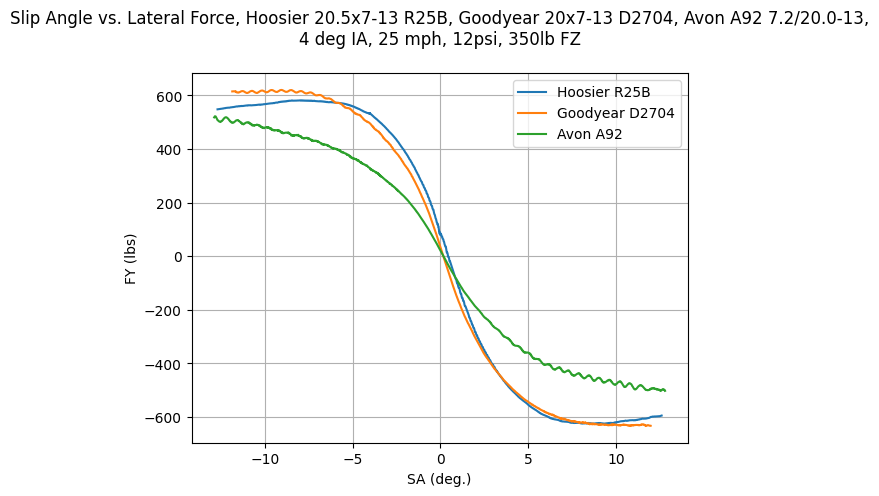

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965run42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965raw6.xlsx"
file_path_Cooper = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 7/cornering/A1706run18.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['IA_4_250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])
df_c_avon = pd.read_excel(file_path_Cooper, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['IA_4_250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']
df_c_avon = df_c_avon['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into tuples (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SA_H_tup)-int(avg/2)):
    a_avg = A_SA_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(A_FY_H_tup)-int(avg/2)):
    a_avg = A_FY_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_avg.append(a_avg)


# Sorting Data into Tuples and Trimming (Goodyear D2704)

A_SA_G = Adata_G['SA']
A_SA_G = A_SA_G[1:]

A_FY_G = Adata_G['FY']
A_FY_G = A_FY_G[1:]

# Turning Pandas data into tuples (Goodyear D2704)

A_SA_G_tup = []

for i in A_SA_G:
    A_SA_G_tup.append(i)

A_FY_G_tup = []

for i in A_FY_G:
    A_FY_G_tup.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
A_SA_G_avg = []
A_FY_G_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (Goodyear D2704)

avg = 20

for i in range(int(avg/2), len(A_SA_G_tup)-int(avg/2)):
    a_avg = A_SA_G_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_G_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Goodyear D2704)
        
for i in range(int(avg/2), len(A_FY_G_tup)-int(avg/2)):
    a_avg = A_FY_G_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_G_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SA_H_S = Adata_H_S['SA']
A_SA_H_S = A_SA_H_S[2:]

A_FY_H_S = Adata_H_S['FY']
A_FY_H_S = A_FY_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SA_H_S_tup = []

for i in A_SA_H_S:
    A_SA_H_S_tup.append(i)

A_FY_H_S_tup = []

for i in A_FY_H_S:
    A_FY_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SA_H_S_avg = []
A_FY_H_S_avg = []

# Averaging function for SA, takes average ever 20 data points (10" Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SA_H_S_tup)-int(avg/2)):
    a_avg = A_SA_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_S_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (10" Hoosier R25B)
        
for i in range(int(avg/2), len(A_FY_H_S_tup)-int(avg/2)):
    a_avg = A_FY_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_S_avg.append(a_avg)


# Sorting Data into Tuples and Trimming (Cooper AVON)

c_avon_sa = df_c_250['SA']
c_avon_sa = c_avon_sa[1:]

c_avon_fy = df_c_250['FY']
c_avon_fy = c_avon_fy[1:]

# Turning Pandas data into tuples (Cooper AVON)

c_avon_sa_lst = []

for i in c_avon_sa:
    c_avon_sa_lst.append(i)

c_avon_fy_lst = []

for i in c_avon_fy:
    c_avon_fy_lst.append(i)

# Variables for below averaging functions (Cooper AVON)
    
c_avon_sa_avg = []
c_avon_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (Cooper AVON)

avg = 20

for i in range(int(avg/2), len(c_avon_sa_lst)-int(avg/2)):
    a_avg = c_avon_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_avon_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Cooper AVON)
        
for i in range(int(avg/2), len(c_avon_fy_lst)-int(avg/2)):
    a_avg = c_avon_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_avon_fy_avg.append(a_avg)

# Plotting

plt.plot(A_SA_H_avg, A_FY_H_avg, label='Hoosier R25B')
plt.plot(A_SA_G_avg, A_FY_G_avg, label='Goodyear D2704')
#plt.plot(A_SA_H_S_avg, A_FY_H_S_avg, label='10" Hoosier R25B')
plt.plot(c_avon_sa_avg, c_avon_fy_avg, label='Avon A92')
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 R25B, Goodyear 20x7-13 D2704, Avon A92 7.2/20.0-13,\n4 deg IA, 25 mph, 12psi, 350lb FZ\n')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
plt.show()

Slip Angle vs. Aligning Torque for Hoosier 20.5x7.0-13 R25B, Goodyear D2704, and Hoosier 16x7.5-10 R25B

          SA       FY
606  2.47855  46.0895
           SA       FY
744  2.850425  48.7915
         SA       FY
832  4.2138  37.4545


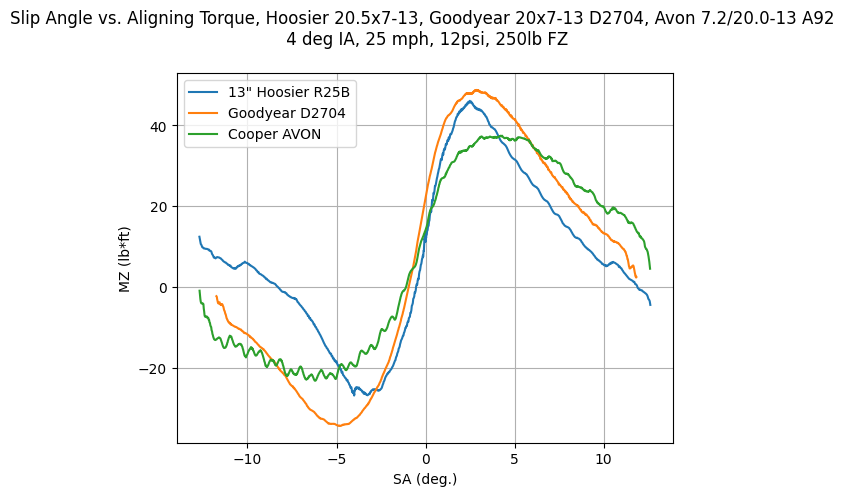

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965run42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965raw6.xlsx"
data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['IA_4_250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['IA_4_250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_MZ_H = Adata_H['MZ']
A_MZ_H = A_MZ_H[1:]

# Turning Pandas data into tuples (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_MZ_H_tup = []

for i in A_MZ_H:
    A_MZ_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_MZ_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SA_H_tup)-int(avg/2)):
    a_avg = A_SA_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for MZ, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(A_MZ_H_tup)-int(avg/2)):
    a_avg = A_MZ_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_MZ_H_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (Goodyear D2704)

A_SA_G = Adata_G['SA']
A_SA_G = A_SA_G[1:]

A_MZ_G = Adata_G['MZ']
A_MZ_G = A_MZ_G[1:]

# Turning Pandas data into tuples (Goodyear D2704)

A_SA_G_tup = []

for i in A_SA_G:
    A_SA_G_tup.append(i)

A_MZ_G_tup = []

for i in A_MZ_G:
    A_MZ_G_tup.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
A_SA_G_avg = []
A_MZ_G_avg = []

# Averaging function for SA, takes average ever 20 data points (Goodyear D2704)
        
avg = 40

for i in range(int(avg/2), len(A_SA_G_tup)-int(avg/2)):
    a_avg = A_SA_G_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_G_avg.append(a_avg)

# Averaging function for MZ, takes average ever 20 data points (Goodyear D2704)

for i in range(int(avg/2), len(A_MZ_G_tup)-int(avg/2)):
    a_avg = A_MZ_G_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_MZ_G_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SA_H_S = Adata_H_S['SA']
A_SA_H_S = A_SA_H_S[2:]

A_MZ_H_S = Adata_H_S['MZ']
A_MZ_H_S = A_MZ_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SA_H_S_tup = []

for i in A_SA_H_S:
    A_SA_H_S_tup.append(i)

A_MZ_H_S_tup = []

for i in A_MZ_H_S:
    A_MZ_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SA_H_S_avg = []
A_MZ_H_S_avg = []

# Averaging function for SA, takes average ever 20 data points (10" Hoosier R25B)

avg = 40

for i in range(int(avg/2), len(A_SA_H_S_tup)-int(avg/2)):
    a_avg = A_SA_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_S_avg.append(a_avg)

# Averaging function for MZ, takes average ever 20 data points (10" Hoosier R25B)
        
for i in range(int(avg/2), len(A_MZ_H_S_tup)-int(avg/2)):
    a_avg = A_MZ_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_MZ_H_S_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (Cooper AVON)

c_avon_sa = df_c_250['SA']
c_avon_sa = c_avon_sa[1:]

c_avon_mz = df_c_250['MZ']
c_avon_mz = c_avon_mz[1:]

# Turning Pandas data into tuples (Cooper AVON)

c_avon_sa_lst = []

for i in c_avon_sa:
    c_avon_sa_lst.append(i)

c_avon_mz_lst = []

for i in c_avon_mz:
    c_avon_mz_lst.append(i)

# Variables for below averaging functions (Cooper AVON)
    
c_avon_sa_avg = []
c_avon_mz_avg = []

# Averaging function for SA, takes average ever 20 data points (Cooper AVON)

avg = 40

for i in range(int(avg/2),len(c_avon_sa_lst)-int(avg/2)):
    a_avg = c_avon_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_avon_sa_avg.append(a_avg)

# Averaging function for MZ, takes average ever 20 data points (Cooper AVON)
        
for i in range(int(avg/2), len(c_avon_mz_lst)-int(avg/2)):
    a_avg = c_avon_mz_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_avon_mz_avg.append(a_avg)

# Finding Slip Angle at Peak Aligning Torque values
    
data = {'SA':A_SA_H_avg[:-1], 'FY':A_MZ_H_avg[:-1]}
df_h = pd.DataFrame(data)
print(df_h.loc[df_h['FY'] == df_h.max()['FY']])

data = {'SA':A_SA_G_avg[:-1], 'FY':A_MZ_G_avg[:-1]}
df_g = pd.DataFrame(data)
print(df_g.loc[df_g['FY'] == df_g.max()['FY']])

data = {'SA':c_avon_sa_avg[:-1], 'FY':c_avon_mz_avg[:-1]}
df_c = pd.DataFrame(data)
print(df_c.loc[df_c['FY'] == df_c.max()['FY']])

# Plotting

plt.plot(A_SA_H_avg, A_MZ_H_avg, label='13" Hoosier R25B')
plt.plot(A_SA_G_avg, A_MZ_G_avg, label='Goodyear D2704')
#plt.plot(A_SA_H_S_avg, A_MZ_H_S_avg, label=' 10" Hoosier R25B')
plt.plot(c_avon_sa_avg, c_avon_mz_avg, label='Cooper AVON')
plt.title('Slip Angle vs. Aligning Torque, Hoosier 20.5x7-13, Goodyear 20x7-13 D2704, Avon 7.2/20.0-13 A92 \n 4 deg IA, 25 mph, 12psi, 250lb FZ\n')
plt.xlabel('SA (deg.)')
plt.ylabel('MZ (lb*ft)')
plt.grid(True)
plt.legend()
plt.show()

Slip Ratio vs. Longitudinal Velocity for Hoosier 20.5x7.0-13 R25B, Goodyear D2704, and Avon A92 7.2/20.0-13

[-814.584, -814.6874999999999, -814.914, -814.6634999999999, -814.8515, -815.4994999999998, -816.0835, -816.233, -817.1159999999999, -818.2929999999999, -818.0964999999999, -818.6784999999998, -819.0194999999998, -820.1485, -820.311, -821.3219999999999, -821.6819999999998, -822.4429999999999, -823.0134999999998, -823.6144999999999, -825.5054999999999, -826.8695, -828.3949999999999, -830.1379999999999, -831.5974999999999, -832.8089999999999, -833.8435, -834.8369999999999, -835.1134999999998, -835.3945, -836.8504999999999, -838.1565, -838.7055, -838.8790000000001, -839.8515, -839.6735000000001, -840.3635, -840.2965000000002, -840.5565, -840.6270000000001, -840.5055, -840.7665000000001, -840.6790000000001, -840.7135000000001, -840.4945, -840.5325, -840.5110000000001, -840.7695, -841.1159999999998, -841.4464999999998, -841.1009999999999, -841.0944999999999, -841.693, -842.3785000000001, -842.7220000000001, -843.1905000000003, -843.4825000000003, -843.6960000000001, -844.2070000000001, -844

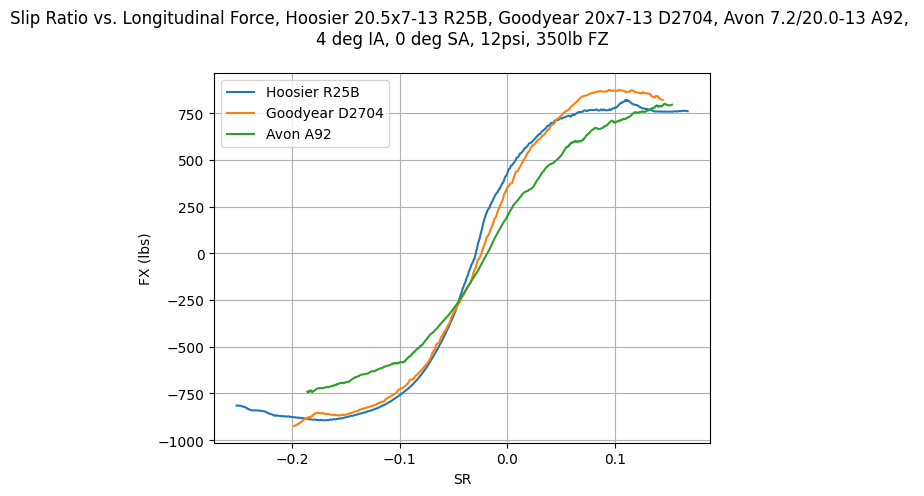

In [ ]:
# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 4/Raw Data/Brake-Accel Data/A1320run125_(12psi).xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/DriveBrake/A1965run57.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965raw6.xlsx"
file_path_Cooper = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 7/drive-brake/A170run36.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['350_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])
df_c_avon = pd.read_excel(file_path_Cooper, sheet_name=['IA_4_350_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['350_lb_FZ']
Adata_G = data_G['350_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']
df_c_avon = df_c_avon['IA_4_350_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SR_H = Adata_H['SR']
A_SR_H = A_SR_H[1:]

A_FX_H = Adata_H['FX']
A_FX_H = A_FX_H[1:]

# Turning Pandas data into lists (Hoosier R25B)

A_SR_H_tup = []

for i in A_SR_H:
    A_SR_H_tup.append(i)

A_FX_H_tup = []

for i in A_FX_H:
    A_FX_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SR_H_avg = []
A_FX_H_avg = []

# Averaging function for SR, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SR_H_tup)-int(avg/2)):
    a_avg = A_SR_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SR_H_avg.append(a_avg)

# Averaging function for FX, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(A_FX_H_tup)-int(avg/2)):
    a_avg = A_FX_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FX_H_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (Goodyear D2704)

A_SR_G = Adata_G['SR']
A_SR_G = A_SR_G[1:]

A_FX_G = Adata_G['FX']
A_FX_G = A_FX_G[1:]

# Turning Pandas data into tuples (Goodyear D2704)

A_SR_G_tup = []

for i in A_SR_G:
    A_SR_G_tup.append(i)

A_FX_G_tup = []

for i in A_FX_G:
    A_FX_G_tup.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
A_SR_G_avg = []
A_FX_G_avg = []

# Averaging function for SR, takes average ever 20 data points (Goodyear D2704)

avg = 20

for i in range(int(avg/2), len(A_SR_G_tup)-int(avg/2)):
    a_avg = A_SR_G_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SR_G_avg.append(a_avg)

# Averaging function for FX, takes average ever 20 data points (Goodyear D2704)
        
for i in range(int(avg/2), len(A_FX_G_tup)-int(avg/2)):
    a_avg = A_FX_G_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FX_G_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SR_H_S = Adata_H_S['SR']
A_SR_H_S = A_SR_H_S[2:]

A_FX_H_S = Adata_H_S['FX']
A_FX_H_S = A_FX_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SR_H_S_tup = []

for i in A_SR_H_S:
    A_SR_H_S_tup.append(i)

A_FX_H_S_tup = []

for i in A_FX_H_S:
    A_FX_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SR_H_S_avg = []
A_FX_H_S_avg = []

# Averaging function for SR, takes average ever 20 data points (10" Hoosier R25B)

#avg = 25

#for i in A_SR_H_S_tup:
    #if b <= avg:
        #a += i
        #b += 1
    #else:
        #a_avg = a/avg
        #A_SR_H_S_avg.append(a_avg)
        #a = 0
        #b = 0

# Averaging function for FX, takes average ever 20 data points (10" Hoosier R25B)
        
#for i in A_FX_H_S_tup:
    #if d <= avg:
        #c += i
        #d += 1
    #else:
        #c_avg = c/avg
        #A_FX_H_S_avg.append(c_avg)
        #c = 0
        #d = 0

# Sorting Data into Tuples and Trimming (Cooper AVON)

c_avon_sr = df_c_avon['SR']
c_avon_sr = c_avon_sr[1:]

c_avon_fx = df_c_avon['FX']
c_avon_fx = c_avon_fx[1:]

# Turning Pandas data into lists (Cooper AVON)

c_avon_sr_lst = []

for i in c_avon_sr:
    c_avon_sr_lst.append(i)

c_avon_fx_lst = []

for i in c_avon_fx:
    c_avon_fx_lst.append(i)

# Variables for below averaging functions (Cooper AVON)
    
c_avon_sr_avg = []
c_avon_fx_avg = []

# Averaging function for SR, takes average ever 20 data points (Cooper AVON)

avg = 20

for i in range(int(avg/2), len(c_avon_sr_lst)-int(avg/2)):
    a_avg = c_avon_sr_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_avon_sr_avg.append(a_avg)

# Averaging function for FX, takes average ever 20 data points (Cooper AVON)
        
for i in range(int(avg/2), len(c_avon_fx_lst)-int(avg/2)):
    a_avg = c_avon_fx_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_avon_fx_avg.append(a_avg)

# Plotting

print(A_FX_H_avg)

plt.plot(A_SR_H_avg, A_FX_H_avg, label='Hoosier R25B')
plt.plot(A_SR_G_avg, A_FX_G_avg, label='Goodyear D2704')
#plt.plot(A_SR_H_S_avg, A_FX_H_S_avg, label='10" Hoosier R25B')
plt.plot(c_avon_sr_avg, c_avon_fx_avg, label='Avon A92')
plt.title('Slip Ratio vs. Longitudinal Force, Hoosier 20.5x7-13 R25B, Goodyear 20x7-13 D2704, Avon 7.2/20.0-13 A92, \n4 deg IA, 0 deg SA, 12psi, 350lb FZ\n')
plt.xlabel('SR')
plt.ylabel('FX (lbs)')
plt.grid(True)
plt.legend()
plt.show()

Slip Angle vs. Lateral Force for Hoosier 20.5x7.0-13 R25B and Hoosier 16x7.5-10 R25B

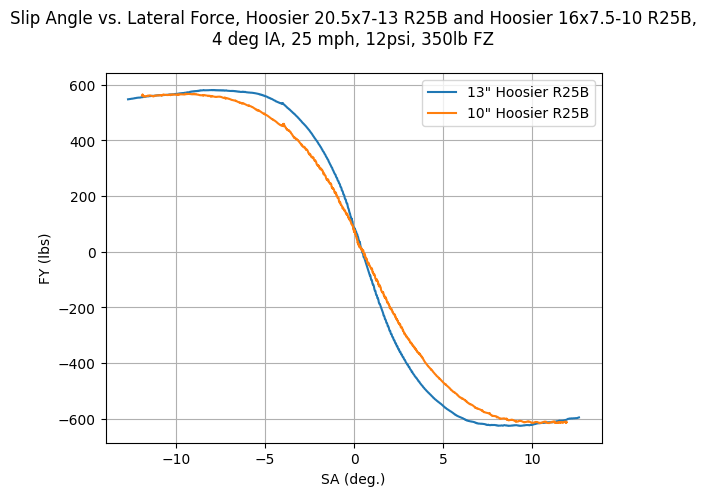

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965raw42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965raw6.xlsx"
file_path_Cooper = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 7/cornering/A1706run18.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])
df_c_avon = pd.read_excel(file_path_Cooper, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']
df_c_avon = df_c_avon['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into tuples (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SA_H_tup)-int(avg/2)):
    a_avg = A_SA_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(A_FY_H_tup)-int(avg/2)):
    a_avg = A_FY_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SA_H_S = Adata_H_S['SA']
A_SA_H_S = A_SA_H_S[2:]

A_FY_H_S = Adata_H_S['FY']
A_FY_H_S = A_FY_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SA_H_S_tup = []

for i in A_SA_H_S:
    A_SA_H_S_tup.append(i)

A_FY_H_S_tup = []

for i in A_FY_H_S:
    A_FY_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SA_H_S_avg = []
A_FY_H_S_avg = []

# Averaging function for SA, takes average ever 20 data points (10" Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SA_H_S_tup)-int(avg/2)):
    a_avg = A_SA_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_S_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (10" Hoosier R25B)
        
for i in range(int(avg/2), len(A_FY_H_S_tup)-int(avg/2)):
    a_avg = A_FY_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_S_avg.append(a_avg)

# Plotting

plt.plot(A_SA_H_avg, A_FY_H_avg, label='13" Hoosier R25B')
plt.plot(A_SA_H_S_avg, A_FY_H_S_avg, label='10" Hoosier R25B')
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 R25B and Hoosier 16x7.5-10 R25B,\n4 deg IA, 25 mph, 12psi, 350lb FZ\n')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
plt.show()

Slip Angle vs. Tire Stiffness

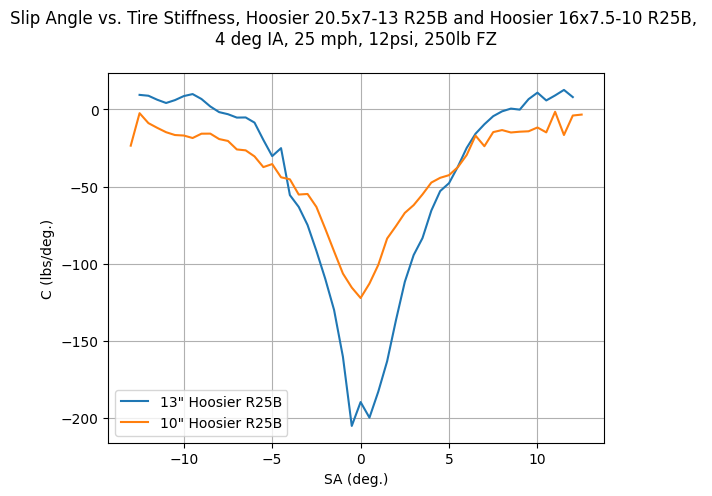

In [ ]:
# Sorting Data into Tuples and Trimming (Hoosier R25B)

h_350_sa = df_h_ia4_250['SA']
h_350_sa = h_350_sa[1:]

h_350_fy = df_h_ia4_250['FY']
h_350_fy = h_350_fy[1:]

# Turning Pandas data into lists (Hoosier R25B)

h_350_sa_lst = []

for i in h_350_sa:
    h_350_sa_lst.append(i)

h_350_fy_lst = []

for i in h_350_fy:
    h_350_fy_lst.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
h_350_sa_avg = []
h_350_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(h_350_sa_lst)-int(avg/2)):
    a_avg = h_350_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_350_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(h_350_fy_lst)-int(avg/2)):
    a_avg = h_350_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    h_350_fy_avg.append(a_avg)

# Converting Data into Dataframe (Hoosier R25B)
    
data = {'SA':h_350_sa_avg[:-1], 'FY':h_350_fy_avg[:-1]}

df_h = pd.DataFrame(data)

# Finding C using Aidan's Dataframe method (Hoosier R25B)

for i in [x/10 for x in range(-135, 135, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = df_h.loc[((df_h['SA']) > i-0.25) & ((df_h['SA']) < i + 0.25)]
    # get average values for each interval
    df_h.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Hoosier R25B)

sa = df_h['SA']

for i in df_h.index:   
    if i != sa[i]:
        df_h = df_h.drop([i])

df_h = df_h.sort_values(by='SA')

# Finding Derivatives (Hoosier R25B)

sa_lst = []
for i in df_h['SA']:
    sa_lst.append(i)

fy_lst = []
for i in df_h['FY']:
    fy_lst.append(i)

c_avg = []

for i in range(len(df_h['SA'])-1):
    if (sa_lst[i+1]-sa_lst[i]) != 0:
        dFYdSA = (fy_lst[i+1]-fy_lst[i])/(sa_lst[i+1]-sa_lst[i])
        c_avg.append(dFYdSA)

# Sorting Data into Tuples and Trimming (Goodyear D2704)

c_250_sa = df_c_250['SA']
c_250_sa = c_250_sa[1:]

c_250_fy = df_c_250['FY']
c_250_fy = c_250_fy[1:]

# Turning Pandas data into lists (Goodyear D2704)

c_250_sa_lst = []

for i in c_250_sa:
    c_250_sa_lst.append(i)

c_250_fy_lst = []

for i in c_250_fy:
    c_250_fy_lst.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
c_250_sa_avg = []
c_250_fy_avg = []

# Averaging function for SA, takes average ever 20 data points (Goodyear D2704)

avg = 20

for i in range(int(avg/2), len(c_250_sa_lst)-int(avg/2)):
    a_avg = c_250_sa_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_250_sa_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Goodyear D2704)
        
for i in range(int(avg/2), len(c_250_fy_lst)-int(avg/2)):
    a_avg = c_250_fy_lst[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    c_250_fy_avg.append(a_avg)

# Converting Data into Dataframe (Goodyear D2704)
    
data = {'SA':c_250_sa_avg[:-1], 'FY':c_250_fy_avg[:-1]}

df_c = pd.DataFrame(data)

# Finding C using Aidan's Dataframe method (Goodyear D2704)

for i in [x/10 for x in range(-135, 135, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = df_c.loc[((df_c['SA']) > i-0.25) & ((df_c['SA']) < i + 0.25)]
    # get average values for each interval
    df_c.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Goodyear D2704)

c_250_sa = df_c['SA']

for i in df_c.index:   
    if i != c_250_sa[i]:
        df_c = df_c.drop([i])

df_c = df_c.sort_values(by='SA')

# Finding Derivatives (Goodyear D2704)

c_250_sa_lst = []
for i in df_c['SA']:
    c_250_sa_lst.append(i)

c_250_fy_lst = []
for i in df_c['FY']:
    c_250_fy_lst.append(i)

c_250_c_avg = []

for i in range(len(df_c['SA'])-1):
    if (c_250_sa_lst[i+1]-c_250_sa_lst[i]) != 0:
        dFYdSA = (c_250_fy_lst[i+1]-c_250_fy_lst[i])/(c_250_sa_lst[i+1]-c_250_sa_lst[i])
        c_250_c_avg.append(dFYdSA)

# Plotting

plt.plot(sa_lst[:-1], c_avg, label='13" Hoosier R25B')
plt.plot(c_250_sa_lst[:-1], c_250_c_avg, label='10" Hoosier R25B')
plt.title('Slip Angle vs. Tire Stiffness, Hoosier 20.5x7-13 R25B and Hoosier 16x7.5-10 R25B, \n4 deg IA, 25 mph, 12psi, 250lb FZ\n')
plt.xlabel('SA (deg.)')
plt.ylabel('C (lbs/deg.)')
plt.grid(True)
plt.legend()
plt.show()

Slip Ratio vs. Aligning Torque

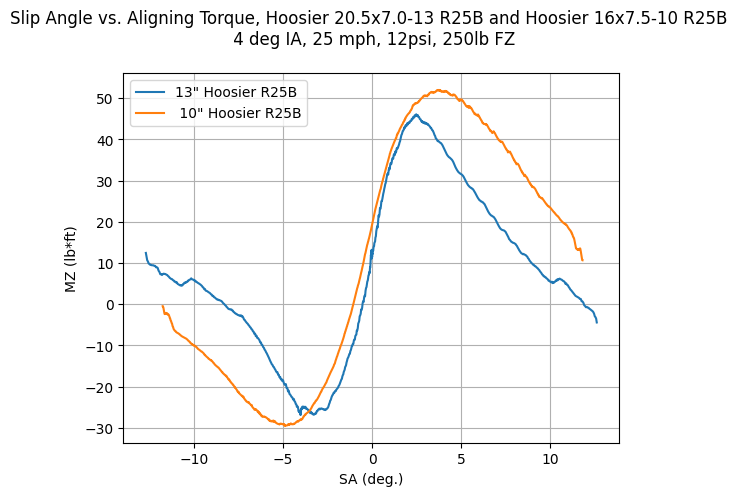

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965run42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/ttc-data/Round 8/Cornering Data/A1965run6.xlsx"
data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['IA_4_250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['IA_4_250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_MZ_H = Adata_H['MZ']
A_MZ_H = A_MZ_H[1:]

# Turning Pandas data into tuples (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_MZ_H_tup = []

for i in A_MZ_H:
    A_MZ_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_MZ_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 20

for i in range(int(avg/2), len(A_SA_H_tup)-int(avg/2)):
    a_avg = A_SA_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for MZ, takes average ever 20 data points (Hoosier R25B)
        
for i in range(int(avg/2), len(A_MZ_H_tup)-int(avg/2)):
    a_avg = A_MZ_H_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_MZ_H_avg.append(a_avg)

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SA_H_S = Adata_H_S['SA']
A_SA_H_S = A_SA_H_S[2:]

A_MZ_H_S = Adata_H_S['MZ']
A_MZ_H_S = A_MZ_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SA_H_S_tup = []

for i in A_SA_H_S:
    A_SA_H_S_tup.append(i)

A_MZ_H_S_tup = []

for i in A_MZ_H_S:
    A_MZ_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SA_H_S_avg = []
A_MZ_H_S_avg = []

# Averaging function for SA, takes average ever 20 data points (10" Hoosier R25B)

avg = 40

for i in range(int(avg/2), len(A_SA_H_S_tup)-int(avg/2)):
    a_avg = A_SA_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_S_avg.append(a_avg)

# Averaging function for MZ, takes average ever 20 data points (10" Hoosier R25B)
        
for i in range(int(avg/2), len(A_MZ_H_S_tup)-int(avg/2)):
    a_avg = A_MZ_H_S_tup[i-int(avg/2):i+int(avg/2)]
    a_avg = sum(a_avg)/(len(a_avg))
    A_MZ_H_S_avg.append(a_avg)

# Plotting

plt.plot(A_SA_H_avg, A_MZ_H_avg, label='13" Hoosier R25B')
plt.plot(A_SA_H_S_avg, A_MZ_H_S_avg, label=' 10" Hoosier R25B')
plt.title('Slip Angle vs. Aligning Torque, Hoosier 20.5x7.0-13 R25B and Hoosier 16x7.5-10 R25B \n 4 deg IA, 25 mph, 12psi, 250lb FZ\n')
plt.xlabel('SA (deg.)')
plt.ylabel('MZ (lb*ft)')
plt.grid(True)
plt.legend()
plt.show()

Yaw-Moment Diagram Slip Angle Dataframe 0 deg IA

In [2]:
# Creating Initial Dataframe from Slip Angle vs. Lateral Force Data

data_h_ia1_50 = {'SA':h_ia1_50_sa_avg, 'FY':h_ia1_50_fy_avg}
data_h_ia1_100 = {'SA':h_ia1_100_sa_avg, 'FY':h_ia1_100_fy_avg}
data_h_ia1_150 = {'SA':h_ia1_150_sa_avg, 'FY':h_ia1_150_fy_avg}
data_h_ia1_250 = {'SA':h_ia1_250_sa_avg, 'FY':h_ia1_250_fy_avg}
data_h_ia1_350 = {'SA':h_ia1_350_sa_avg, 'FY':h_ia1_350_fy_avg}

df_h_ia1_50 = pd.DataFrame(data_h_ia1_50)
df_h_ia1_100 = pd.DataFrame(data_h_ia1_100)
df_h_ia1_150 = pd.DataFrame(data_h_ia1_150)
df_h_ia1_250 = pd.DataFrame(data_h_ia1_250)
df_h_ia1_350 = pd.DataFrame(data_h_ia1_350)

# Sorting and Averaging Slip Angle by 0.1 increments

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_ia1_50.loc[((df_h_ia1_50['SA']) > i-0.05) & ((df_h_ia1_50['SA']) < i + 0.05)]
    df_h_ia1_50.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_ia1_100.loc[((df_h_ia1_100['SA']) > i-0.05) & ((df_h_ia1_100['SA']) < i + 0.05)]
    df_h_ia1_100.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_ia1_150.loc[((df_h_ia1_150['SA']) > i-0.05) & ((df_h_ia1_150['SA']) < i + 0.05)]
    df_h_ia1_150.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_ia1_250.loc[((df_h_ia1_250['SA']) > i-0.05) & ((df_h_ia1_250['SA']) < i + 0.05)]
    df_h_ia1_250.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_ia1_350.loc[((df_h_ia1_350['SA']) > i-0.05) & ((df_h_ia1_350['SA']) < i + 0.05)]
    df_h_ia1_350.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Hoosier R25B)

sa_ia1_50 = df_h_ia1_50['SA']
for i in df_h_ia1_50.index:   
    if i != sa_ia1_50[i]:
        df_h_ia1_50_ = df_h_ia1_50.drop([i])
df_h_ia1_50 = df_h_ia1_50.sort_values(by='SA')

sa_ia1_100 = df_h_ia1_100['SA']
for i in df_h_ia1_100.index:   
    if i != sa_ia1_100[i]:
        df_h_ia1_100_ = df_h_ia1_100.drop([i])
df_h_ia1_100 = df_h_ia1_100.sort_values(by='SA')

sa_ia1_150 = df_h_ia1_150['SA']
for i in df_h_ia1_150.index:   
    if i != sa_ia1_150[i]:
        df_h_ia1_150_ = df_h_ia1_150.drop([i])
df_h_ia1_150 = df_h_ia1_150.sort_values(by='SA')

sa_ia1_250 = df_h_ia1_250['SA']
for i in df_h_ia1_250.index:   
    if i != sa_ia1_250[i]:
        df_h_ia1_250 = df_h_ia1_250.drop([i])
df_h_ia1_250 = df_h_ia1_250.sort_values(by='SA')

sa_ia1_350 = df_h_ia1_350['SA']
for i in df_h_ia1_350.index:   
    if i != sa_ia1_350[i]:
        df_h_ia1_350 = df_h_ia1_350.drop([i])
df_h_ia1_350 = df_h_ia1_350.sort_values(by='SA')

zeros = np.zeros(len(df_h_ia1_350.index))

# Plotting Slip Angle vs Lateral Force to confirm that dataframes accurately represent data

#plt.plot(h_ia1_50__sa_avg, h_ia1_50__fy_avg)
#plt.plot(h_ia1_100__sa_avg, h_ia1_100__fy_avg)
#plt.plot(h_ia1_150__sa_avg, h_ia1_150__fy_avg)
#plt.plot(h_ia1_250_sa_avg, h_ia1_250_fy_avg)
#plt.plot(h_ia1_350_sa_avg, h_ia1_350_fy_avg)
#plt.scatter(df_h_ia1_50_['SA'], df_h_ia1_50_['FY'])
#plt.scatter(df_h_ia1_100_['SA'], df_h_ia1_100_['FY'])
#plt.scatter(df_h_ia1_150_['SA'], df_h_ia1_150_['FY'])
#plt.scatter(df_h_ia1_250['SA'], df_h_ia1_250['FY'])
#plt.scatter(df_h_ia1_350['SA'], df_h_ia1_350['FY'])
#plt.title('Slip Angle vs. Lateral Force, 3 deg IA, 25 mph, 12psi')
#plt.xlabel('SA (deg.)')
#plt.ylabel('FY (lbs)')
#plt.grid(True)
#plt.show()

# Creating Master Dataframe

data_h_ia1_mstr = {'SA':df_h_ia1_50['SA'], '0':zeros, '50':df_h_ia1_50['FY'], '100':df_h_ia1_100['FY'],'150':df_h_ia1_150['FY'], '250':df_h_ia1_250['FY'], '350':df_h_ia1_350['FY']}
df_h_ia1_mstr = pd.DataFrame(data_h_ia1_mstr)
df_h_ia1_mstr = df_h_ia1_mstr.dropna()

# Creating multiple Fz values

# Converting Dataframre columns into list
col_lst = df_h_ia1_mstr.columns

# converting dataframe index into a list
indx_lst = []
for i in df_h_ia1_mstr.index:
    indx_lst.append(i)

# data list that will be used to creat master master dataframe
data = []

# Creating in-between values for Fz

# Loop for each slip angle value, ie. -12.7, -12.6, ... , 12.5, 12.6
for i in range(len(indx_lst)):
    lst = []
    # range(1,6) is 0, 50, 100, 150, 250, 350
    for j in range(1,6):
        # slope is dFy/dFz, coincedentally the coefficient of friction. Different slope for different interval, ie. 50-100
        slope = (df_h_ia1_mstr.iloc[i,j+1]-df_h_ia1_mstr.iloc[i,j])/(float(col_lst[j+1])-float(col_lst[j]))
        # Loop for calculating each individual Fy for value for ech Fz value
        for k in range(int(col_lst[j+1])-int(col_lst[j])):
            lst.append(df_h_ia1_mstr.iloc[i,j]+slope*k)
    data.append(lst)

# creating list for columns for dataframe
columns = []
for i in range(350):
    i = float(i)
    columns.append(i)

# Creating ultimate Fy dataframe!
df_h_ia1_fy = pd.DataFrame(data, columns=columns, index=indx_lst)

display(df_h_ia1_fy)


NameError: name 'h_ia1_50_sa_avg' is not defined

In [25]:
# Creating Initial Dataframe from Slip Angle vs. Lateral Force Data

data_h_50 = {'SA':h_50_sa_avg, 'FY':h_50_fy_avg}
data_h_100 = {'SA':h_100_sa_avg, 'FY':h_100_fy_avg}
data_h_150 = {'SA':h_150_sa_avg, 'FY':h_150_fy_avg}
data_h_250 = {'SA':h_250_sa_avg, 'FY':h_250_fy_avg}
data_h_350 = {'SA':h_350_sa_avg, 'FY':h_350_fy_avg}

df_h_50 = pd.DataFrame(data_h_50)
df_h_100 = pd.DataFrame(data_h_100)
df_h_150 = pd.DataFrame(data_h_150)
df_h_250 = pd.DataFrame(data_h_250)
df_h_350 = pd.DataFrame(data_h_350)

# Sorting and Averaging Slip Angle by 0.1 increments

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_50.loc[((df_h_50['SA']) > i-0.05) & ((df_h_50['SA']) < i + 0.05)]
    df_h_50.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_100.loc[((df_h_100['SA']) > i-0.05) & ((df_h_100['SA']) < i + 0.05)]
    df_h_100.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_150.loc[((df_h_150['SA']) > i-0.05) & ((df_h_150['SA']) < i + 0.05)]
    df_h_150.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_250.loc[((df_h_250['SA']) > i-0.05) & ((df_h_250['SA']) < i + 0.05)]
    df_h_250.loc[i] = [i, rows['FY'].mean()]

for i in [x/10 for x in range(-130, 130, 1)]:
    rows = df_h_350.loc[((df_h_350['SA']) > i-0.05) & ((df_h_350['SA']) < i + 0.05)]
    df_h_350.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines (Hoosier R25B)

sa_50 = df_h_50['SA']
for i in df_h_50.index:   
    if i != sa_50[i]:
        df_h_50 = df_h_50.drop([i])
df_h_50 = df_h_50.sort_values(by='SA')

sa_100 = df_h_100['SA']
for i in df_h_100.index:   
    if i != sa_100[i]:
        df_h_100 = df_h_100.drop([i])
df_h_100 = df_h_100.sort_values(by='SA')

sa_150 = df_h_150['SA']
for i in df_h_150.index:   
    if i != sa_150[i]:
        df_h_150 = df_h_150.drop([i])
df_h_150 = df_h_150.sort_values(by='SA')

sa_250 = df_h_250['SA']
for i in df_h_250.index:   
    if i != sa_250[i]:
        df_h_250 = df_h_250.drop([i])
df_h_250 = df_h_250.sort_values(by='SA')

sa_350 = df_h_350['SA']
for i in df_h_350.index:   
    if i != sa_350[i]:
        df_h_350 = df_h_350.drop([i])
df_h_350 = df_h_350.sort_values(by='SA')

zeros = np.zeros(len(df_h_350.index))

# Creating Master Dataframe

data_h_mstr = {'SA':df_h_50['SA'], '0':zeros, '50':df_h_50['FY'], '100':df_h_100['FY'], '150':df_h_150['FY'], '250':df_h_250['FY'], '350':df_h_350['FY']}
df_h_mstr = pd.DataFrame(data_h_mstr)
df_h_mstr = df_h_mstr.dropna()

# Creating multiple Fz values

# Converting Dataframre columns into list
col_lst = df_h_mstr.columns

# converting dataframe index into a list
indx_lst = []
for i in df_h_mstr.index:
    indx_lst.append(i)

# data list that will be used to creat master master dataframe
data = []

# Creating in-between values for Fz

# Loop for each slip angle value, ie. -12.7, -12.6, ... , 12.5, 12.6
for i in range(len(indx_lst)):
    lst = []
    # range(1,6) is 0, 50, 100, 150, 250, 350
    for j in range(1,6):
        # slope is dFy/dFz, coincedentally the coefficient of friction. Different slope for different interval, ie. 50-100
        slope = (df_h_mstr.iloc[i,j+1]-df_h_mstr.iloc[i,j])/(float(col_lst[j+1])-float(col_lst[j]))
        # Loop for calculating each individual Fy for value for each Fz value
        for k in range(int(col_lst[j+1])-int(col_lst[j])):
            lst.append(round((df_h_mstr.iloc[i,j]+slope*k),2))
    data.append(lst)

# creating list for columns for dataframe
columns = []
for i in range(350):
    i = float(i)
    columns.append(i)

# Creating ultimate Fy dataframe!
df_h_fy = pd.DataFrame(data, columns=columns, index=indx_lst)

# finding maximum values for a given Fz

# Car variables
speed = 150 # in/s
tradius = 26*12 # in
car_w = 569 # lbm
drvr_w = 120 # lbm
net_w = car_w + drvr_w
w_splt = 0.507 # biased towards front. More than .5 = front heavier.
frnt_w = net_w*w_splt
rear_w = net_w*(1-w_splt)

# Converting tangential speed to centrifugal force (Fc = mv^2/R)
net_fy = 1.7*net_w #net_w*speed**2/(tradius*32.2)
fy_frnt = w_splt*net_fy
fy_rear = (1-w_splt)*net_fy
print(f"total real fy = {net_fy}, front real fy = {fy_frnt}, rear real fy = {fy_rear}")

# Determining if front or rear is limiting factor
if frnt_w > rear_w:
    f_z_max = round(frnt_w,0)
    f_z_min = round(rear_w,0)
else:
    f_z_max = round(rear_w,0)
    f_z_min = round(frnt_w,0)

# pulling lateral force for maximum slip angle for given f_z
f_y_max = round(df_h_fy[round(f_z_max,0)].max(),2)
f_y_min = round(f_y_max*(1-w_splt)/w_splt, 2)

# printing normal forces
if frnt_w > rear_w:
    print(f"fz front max. = {f_z_max} lbs, fz rear max. = {f_z_min}")
else:
    print(f"fz front max. = {f_z_min} lbs, fz rear max. = {f_z_max} lbs")

# printing maximum lateral forces
if frnt_w > rear_w:
    print("fy front max. =",f_y_max, "fy rear max. =",f_y_min)
else:
    print("fy front max. =",f_y_min, "fy rear max. =",f_y_max)


# Finds slip angle for front wheel. Only works if fy is positive
for i in range(len(df_h_fy[f_z_max])):  # i goes through range from 0 to f_z_max (maximum fz for front or rear)
    if (fy_frnt > df_h_fy.iloc[i, int(f_z_max)]) and (df_h_fy.iloc[i, int(f_z_max)] < df_h_fy.iloc[(i-1), int(f_z_max)]):   # i sweeps through range of fz values. When fy_rear is less than fy of i and past the maximum fy, it gives corresponding slip angle
        print(df_h_fy.index[i]) # prints corresponding slip angle
        break

# Finds slip angle for rear wheel. Only works if fy is positive
for i in range(len(df_h_fy[f_z_max])):  # i goes through range from 0 to f_z_max (maximum fz for front or rear)
    if (fy_rear > df_h_fy.iloc[i, int(f_z_max)]) and (df_h_fy.iloc[i, int(f_z_max)] < df_h_fy.iloc[(i-1), int(f_z_max)]):   # i sweeps through range of fz values. When fy_rear is less than fy of i and past the maximum fy, it gives corresponding slip angle
        print(df_h_fy.index[i]) # prints corresponding slip angle
        break

for i in range(18):
    fz = i*10
    fy = fz*(1.7-0.1*i)

    for i in range(len(df_h_fy[fz])):  # i goes through range from 0 to f_z_max (maximum fz for front or rear)
        if (fy > df_h_fy.iloc[i, int(fz)]) and (df_h_fy.iloc[i, int(fz)] < df_h_fy.iloc[(i-1), int(fz)]):   # i sweeps through range of fz values. When fy_rear is less than fy of i and past the maximum fy, it gives corresponding slip angle
            print(df_h_fy.index[i]) # prints corresponding slip angle
            break


total real fy = 1171.3, front real fy = 593.8491, rear real fy = 577.4508999999999
fz front max. = 349.0 lbs, fz rear max. = 340.0
fy front max. = 786.58 fy rear max. = 764.86
-2.8
-2.7
-1.6
-1.5
-1.4
-1.2
-1.1
-1.0
-0.8
-0.8
-0.7
-0.5
-0.5
-0.4
-0.3
-0.2
-0.1
-0.1
0.0


Yaw-Moment Diagram Slip Angle Dataframe 1 deg IA

Yaw-Moment Diagram Slip Angle Dataframe 2 deg IA

Yaw-Moment Diagram Slip Angle Dataframe 3 deg IA

Yaw-Moment Diagram Slip Angle Dataframe 4 deg IA